In [1]:
import pandas as pd
import numpy as np

# Step 1: Data Exploration and Cleaning

# Load the dataset
try:
    df = pd.read_csv("C:\\Users\\Harshada\\Downloads\\archive (15).zip")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'Housing.csv' was not found. Please check the file path.")
    df = None

if df is not None:
    # Display the first 5 rows to understand the data
    print("\nInitial Data Exploration (First 5 rows):")
    print(df.head())

    # Get a concise summary of the DataFrame
    print("\nData Quality and Structure (df.info()):")
    df.info()

    # Check for missing values
    print("\nChecking for Missing Values:")
    print(df.isnull().sum())

Dataset loaded successfully!

Initial Data Exploration (First 5 rows):
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Quality and Structure 

In [2]:
# Identify categorical columns for one-hot encoding
X = df.drop('price', axis=1)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns to be encoded:")
print(categorical_cols)


Categorical columns to be encoded:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [3]:
# Step 1: Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd

try:
    df = pd.read_csv('archive (15).zip') # Read directly from the zip file
except FileNotFoundError:
    print("Error: The file 'archive (15).zip' was not found. Please check the file path.")
    df = None

if df is not None:
    # Separate features (X) and target variable (y)
    X = df.drop(columns=['price'])
    y = df['price']

    # One-hot encode categorical columns
    X = pd.get_dummies(X, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 2: Model Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 3: Model Evaluation
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print("--- Model Evaluation ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

--- Model Evaluation ---
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R²): 0.65


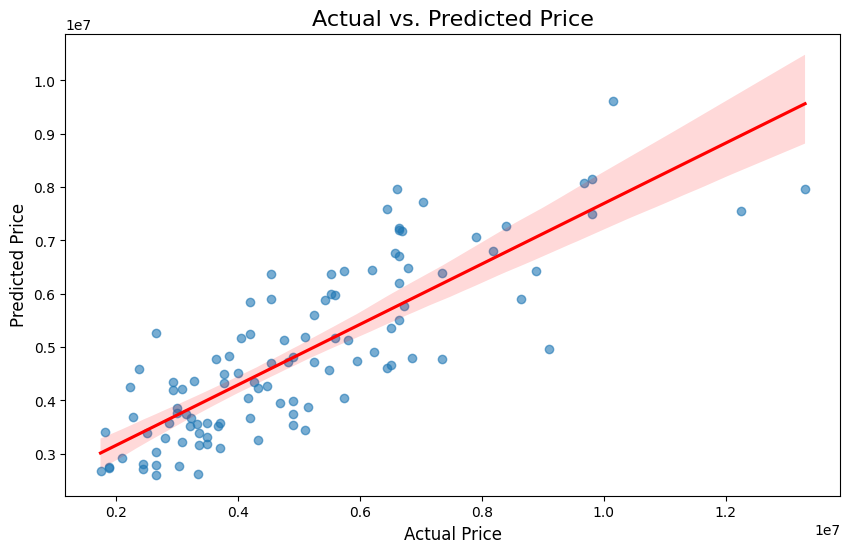

In [4]:
# Step 4: Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Actual vs. Predicted Price', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

